In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sns.set_style("darkgrid")

In [3]:
data_dqn_best = pd.read_pickle("results/grid_search-2000k_steps-256_hidden-batch_size_128-zero_inv_rew/test_results_best-pandas.pickle")

In [4]:
data_dqn_best.sort_values(by=[("dqn", "max_highest_value")], ascending=False)

dqn  \
                                                mean_episode_score   
target_model_update gamma policy                                     
100.000             0.80  annealed_boltzmann  0            1442.60   
                    0.99  annealed_boltzmann  0            1613.04   
1000.000            0.99  annealed_boltzmann  0            1467.68   
10000.000           0.90  annealed_boltzmann  0            1555.44   
10.000              0.90  annealed_boltzmann  0            1542.88   
1000.000            0.90  annealed_boltzmann  0            1221.64   
100.000             0.90  boltzmann           0            1019.16   
                          eps_greedy          0            1065.64   
                          annealed_eps_greedy 0            1066.08   
                          annealed_boltzmann  0            1018.96   
1000.000            0.90  annealed_eps_greedy 0             871.76   
100.000             0.99  annealed_eps_greedy 0            1124.12   
                          boltzmann           0            1094.84   
                          eps_greedy          0            1136.16   
1000.000            0.80  annealed_boltzmann  0            1381.76   
                          annealed_eps_greedy 0            1147.12   
                          boltzmann           0            1028.00   
100.000             0.80  eps_greedy          0            1117.16   
1000.000            0.80  eps_greedy          0             956.20   
                    0.90  boltzmann           0            1112.88   
100.000             0.80  annealed_eps_greedy 0            1097.84   
1000.000            0.90  eps_greedy          0            1027.32   
                    0.99  annealed_eps_greedy 0            1239.92   
                          boltzmann           0            1079.44   
                          eps_greedy          0            1225.84   
10000.000           0.80  annealed_boltzmann  0             853.04   
                          annealed_eps_greedy 0            1153.32   
                          boltzmann           0            1023.52   
                          eps_greedy          0            1145.44   
                    0.90  annealed_eps_greedy 0            1037.32   
...                                                            ...   
0.010               0.80  annealed_boltzmann  0            1236.64   
0.001               0.99  eps_greedy          0            1115.24   
                          boltzmann           0            1086.36   
                          annealed_boltzmann  0            1358.52   
0.010               0.90  annealed_eps_greedy 0            1107.92   
0.001               0.90  eps_greedy          0            1159.08   
                          boltzmann           0            1015.44   
                          annealed_eps_greedy 0            1031.56   
                          annealed_boltzmann  0            1372.92   
                    0.80  eps_greedy          0            1165.80   
                          boltzmann           0            1057.72   
0.010               0.90  annealed_boltzmann  0            1151.92   
                          boltzmann           0            1074.72   
10.000              0.99  eps_greedy          0            1091.44   
                    0.80  eps_greedy          0            1089.28   
                    0.99  boltzmann           0            1025.56   
                          annealed_eps_greedy 0            1263.12   
                          annealed_boltzmann  0            1017.84   
                    0.90  eps_greedy          0             877.48   
                          boltzmann           0            1081.60   
                          annealed_eps_greedy 0            1104.24   
                    0.80  boltzmann           0            1192.16   
0.010               0.90  eps_greedy          0             802.84   
10.000              0.80  annealed_eps_greedy 0            1164.68   
   

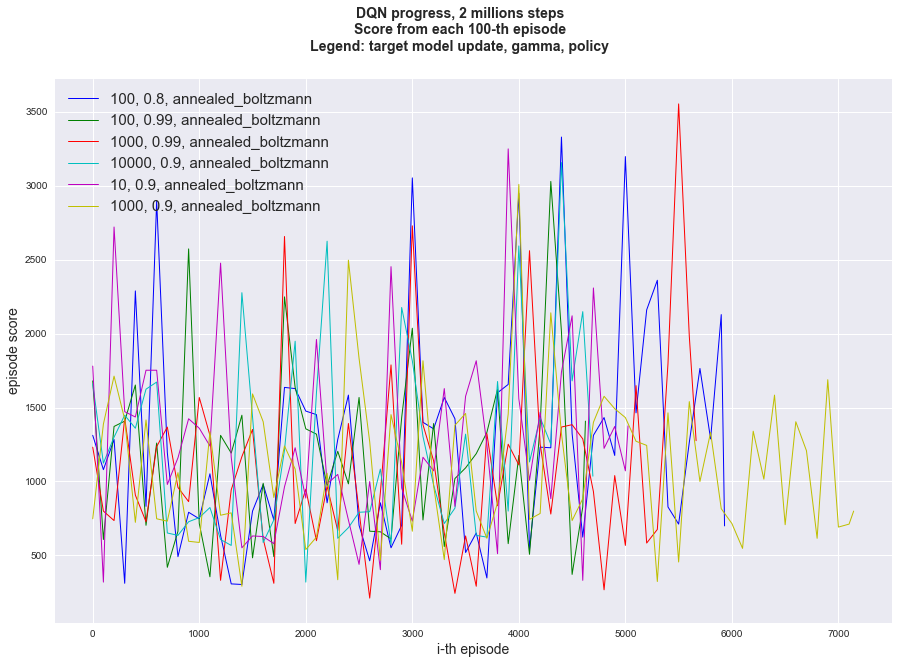

In [43]:
best_agents = [(100, 0.80, "annealed_boltzmann"),
               (100, 0.99, "annealed_boltzmann"),
               (1000, 0.99, "annealed_boltzmann"),
               (10000, 0.90, "annealed_boltzmann"),
               (10, 0.90, "annealed_boltzmann"),
               (1000, 0.90, "annealed_boltzmann")]
logger_file = "results/grid_search-2000k_steps-256_hidden-batch_size_128-zero_inv_rew/logger-train-dqn-2000k_steps-update_{update}-gamma_{gamma}-policy_{policy}.pickle"
colors = ["b", "g", "r", "c", "m", "y"]
plt.figure(figsize=(15, 10))
plt.suptitle("DQN progress, 2 millions steps\nScore from each 100-th episode\nLegend: target model update, gamma, policy", fontsize=14, fontweight="bold")
plt.xlabel("i-th episode", fontsize=14)
plt.ylabel("episode score", fontsize=14)
for agent, color in zip(best_agents, colors):
    agent_log = pd.read_pickle(logger_file.format(update=agent[0], gamma=agent[1], policy=agent[2]))
    episode_scores = [x["episode_score"] for x in agent_log.episodes if "episode_score" in x]
    plt.plot(list(range(0, len(agent_log.episodes), 100)) + [len(agent_log.episodes) - 1],
             episode_scores[::100] + [episode_scores[-1]],
             color,
             label="{}, {}, {}".format(*agent),
             linewidth=1)
plt.legend(fontsize=15)
plt.savefig("images/play_dqn.png", dpi=800)